# 예측하기
특성 데이터들의 관계를 파악해 특정 값을 예측

## K-최근접 이웃 회귀
### 회귀
- 두 변수 사이의 상관 관계를 분석해 값을 예측하는 알고리즘
- 지도 학습 알고리즘
    - 분류(Classifier)와 회귀(Regression)

농어 데이터 : http://bit.ly/perch_data


In [ ]:
import numpy as np

# 농어(perch) 데이터
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

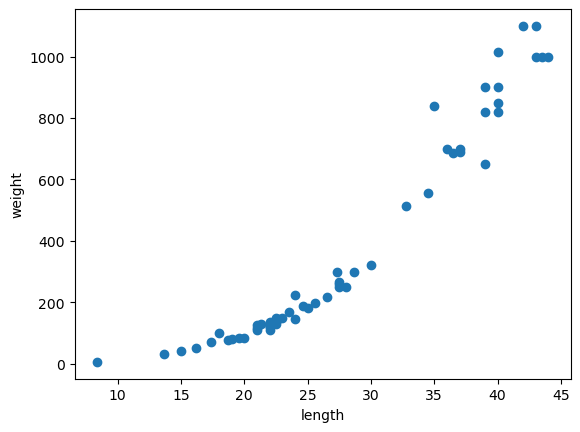

In [1]:
import  matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

# 훈련 세트 준비
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 데이터의 2차원 배열 변환 ( [1, 2, 3] -> [[1], [2], [3]] )
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

# 회귀 모델 클래스
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print('KNRegressor score: ', knr.score(test_input, test_target))


0.992809406101064

## 성능 측정 방법
- 분류 모델: 샘플을 정확하게 분류한 개수의 비율
- 회귀 모델: 결정계수($R^2$)
$$R^2 = 1 - \frac{(타깃 - 평균)^2의 합}{(타깃 - 예측)^2 의 합}$$

타깃: train_target, test_target

평균: mean

예측:

- 타깃의 `평균 정도`를 예측하면 결정 계수는 `0`에 근접
- 예측이 `타깃`에 가까워지면 결정 계수는 `1`에 근접

### 결과에서 예측의 차이값 구하기
- 타깃과 예측의 절대값 오차를 평균해 측정하는 도구
- mean_absolute_error

In [8]:
from sklearn.metrics import mean_absolute_error

# 테스트 데이터의 예측값 구하기
test_prediction = knr.predict(test_input)
# 테스트 데이터와 예측값 비교
mae = mean_absolute_error(test_target, test_prediction)
print(mae) # 평균 19g 정도의 차이를 보임

# 점수 비교
print('훈련: ', knr.score(train_input, train_target))
print('테스트: ', knr.score(test_input, test_target), '- 적합') # 테스트 데이터의 점수가 더 높아서 과대적합임


19.157142857142862
훈련 데이터:  0.9698823289099254
테스트 데이터:  0.992809406101064 - 과대적합


### 과대적합
- 훈련 세트에서 점수가 테스트 세트에서의 점수보다 월등히 높은 경우
- 훈련 세트에만 잘 맞고, 테스트 세트에서는 좋지 않음
### 과소적합
- 훈련 세트보다 테스트 세트에서 점수가 높거나 둘 다 낮은 경우
- 모델이 단순해 적절히 훈련되지 않은 경우
- 세트의 크기가 매우 작은 경우

### 이웃 개수 줄이기
- 과소적합 문제를 해결하기 위해 모델을 복잡하게 만들기
- K-최근접 이웃 알고리즘은 이웃 개수를 기반으로 평가
- 기본값 5, 변경 3

In [ ]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

# 과소적합은 해결되었음
# 이웃 개수를 축소함으로서 그래프가 단순화됨
print('훈련: ', knr.score(train_input, train_target))
print('테스트:', knr.score(test_input, test_target))


## K-최근접 이웃 회귀 모델
- 훈련 세트의 표현 범위를 벗어난 샘플을 입력한 경우는?
- 50cm 농어의 무게는?

[1033.33333333]


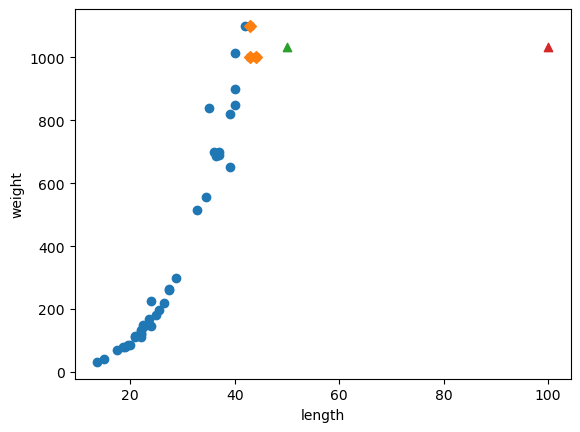

In [19]:
find_target = [[50]]
predict = knr.predict(find_target)

print(predict)

# 50cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors(find_target)

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
# 가장 근사치의 값을 가져오는 것이기 때문에 범위를 벗어나는 값은 예측하지 못함
plt.scatter(50, predict, marker='^')
plt.scatter(100, predict, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()